In [1]:
import ROOT
import os
from my_utils import *
from fst import *
import numpy as np

import pasttrec_ctrl as ptc

#import phidrive
#import micos_eco

data_dir = make_data_dir()



from ROOT import gInterpreter, gSystem
gInterpreter.ProcessLine('#include "/workdir/my_event.h"')




Welcome to JupyROOT 6.14/04


0

In [2]:
##################################################
##   clear data dir, copy root file or measure fresh    ##
##################################################


## new data or existing data?

fresh = 0
use_newest = 1

# data_dir="/workdir/jupyter/tot_data_taking_data/"
# prefer fully unpacked over previews
data_dir="/workdir/jupyter/Cosy2021_tot_data_taking_data/"
possible_file_names = [
 "*.root",
]

# id="ID202"
id="ID212"
# x scan trafo board
#id="id051b15"
#id="id051b30"

#nice example for x scan, pAC, 1750V
#id="id062"

## auto detect scan type ##

root_file_name = ""

for i in range(0,len(possible_file_names)):
  root_file_name = possible_file_names[i]
  file_list = os.popen('  find {:s} -iname "*{:s}" | grep {:s} | sort '.format(data_dir,
    root_file_name,id)).read().split("\n")
  if (len(file_list) > 1):
    break
print(file_list)
#print("len: {:d}".format(len(file_list)))
#file_list = file_list[0:60]
del file_list[-1]
file_list

if fresh:
  trigger_ufsd()
  #trigger_scinti()
  #micos_eco.move(x=79.65,y=71)
  
  ptc.init_active_boards()
  ptc.set_threshold_for_board_by_name("0009",50)
  ptc.set_threshold_for_board_by_name("0018",50)

  #take_data(events=100)
  #take_data(time=10)

 # clear_data_dir()
  #os.system("cp /workdir/joint_tree.root {:s}/".format(data_dir))

#if use_newest:
 # os.system("cp /workdir/joint_tree.root {:s}/".format(data_dir))
    

['/workdir/jupyter/Cosy2021_tot_data_taking_data/ID212_HV1750V_ptime_15_thr_10_gain_2_boardsON_0_sr_10.root', '/workdir/jupyter/Cosy2021_tot_data_taking_data/ID212_HV1750V_ptime_15_thr_10_gain_4_boardsON_0_sr_10.root', '/workdir/jupyter/Cosy2021_tot_data_taking_data/ID212_HV1750V_ptime_15_thr_8_gain_2_boardsON_0_sr_10.root', '/workdir/jupyter/Cosy2021_tot_data_taking_data/ID212_HV1750V_ptime_15_thr_8_gain_4_boardsON_0_sr_10.root', '']


In [3]:
##################################################
##               slurp root file                ##
##################################################

#c = ROOT.TCanvas("myCanvasName","The Canvas Title",640,480)
c = ROOT.TCanvas("myCanvasName","The Canvas Title",500,400)

# for i in range(0,len(file_list)):
    
#   file=file_list[i]
  
#   print(file)
#   f = ROOT.TFile(file)
#   tree = f.Get("joint_tree")

#c.Draw()

In [4]:
file=file_list[0]

print(file)
f = ROOT.TFile(file)
tree = f.Get("joint_tree")

/workdir/jupyter/Cosy2021_tot_data_taking_data/ID212_HV1750V_ptime_15_thr_10_gain_2_boardsON_0_sr_10.root


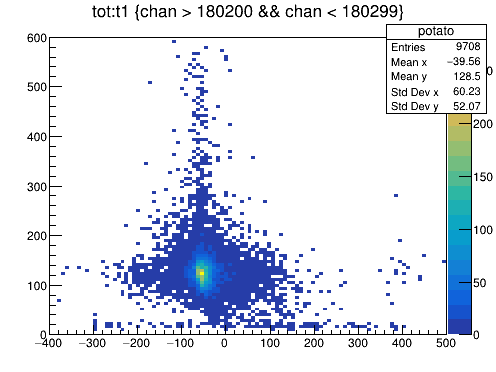

In [5]:

tree.Draw("tot:t1>>potato(100,-400,500,100,0,600)","chan > 180200 && chan < 180299","colz") 
c.Draw()

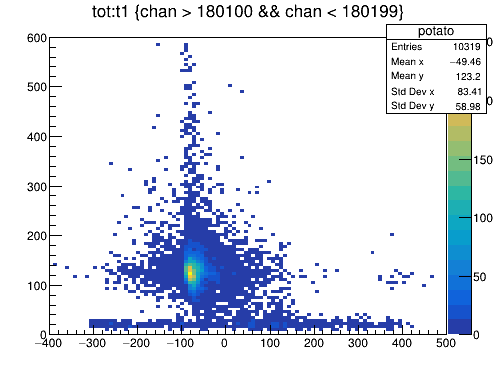

In [6]:

tree.Draw("tot:t1>>potato(100,-400,500,100,0,600)","chan > 180100 && chan < 180199","colz") 
c.Draw()

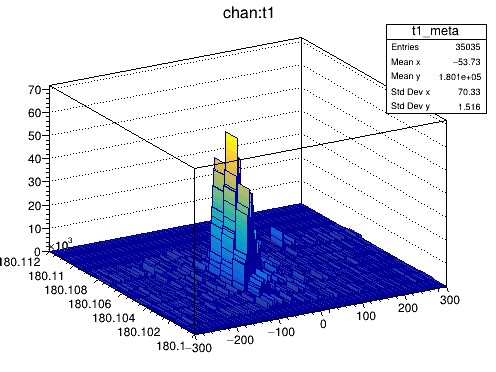

In [7]:
##################################################
##             overview TDC 0x0351              ##
##################################################


tdc=1801
disp_channels = 12
tree.Draw("chan:t1>>t1_meta(1000,-300,300,{:d},{:d},{:d})".format(disp_channels,tdc*100,tdc*100+disp_channels),"","lego2")
c.Draw()

Error in <TSelectorDraw::DrawSelect>: ncols*3 < ncomma ncols=1, ncomma=6


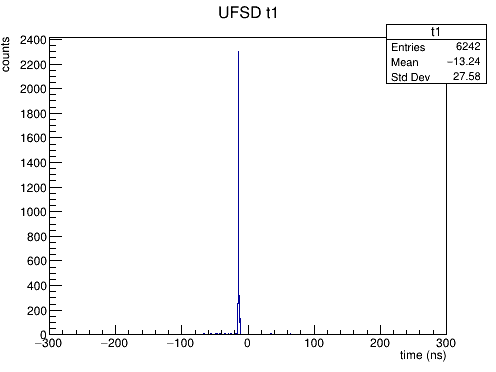

In [8]:
chan = 35049
tree.Draw("t1>>t1(1000,-300,300,{:d},{:d},{:d})".format(disp_channels,tdc*100,tdc*100+disp_channels),"chan=={:d}".format(chan),"colz")
t1=f.Get("t1")
t1.SetTitle("UFSD t1")
t1.GetXaxis().SetTitle("time (ns)")
t1.GetYaxis().SetTitle("counts")
c.Draw()

Error in <TSelectorDraw::DrawSelect>: ncols*3 < ncomma ncols=1, ncomma=6
Warning in <Fit>: Fit data is empty 


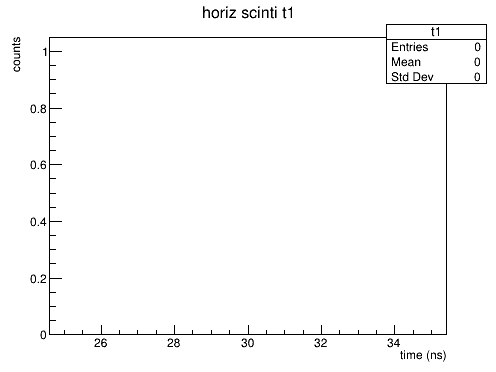

In [9]:
chan = 35048
tree.Draw("t1>>t1(1000,-300,300,{:d},{:d},{:d})".format(disp_channels,tdc*100,tdc*100+disp_channels),"chan=={:d}".format(chan),"colz")
t1=f.Get("t1")
t1.SetTitle("horiz scinti t1")
t1.GetXaxis().SetTitle("time (ns)")
t1.GetYaxis().SetTitle("counts")

t1.GetXaxis().SetRangeUser(25,35)
t1.Draw()
t1.Fit("gaus")
c.Draw()


c.Draw()

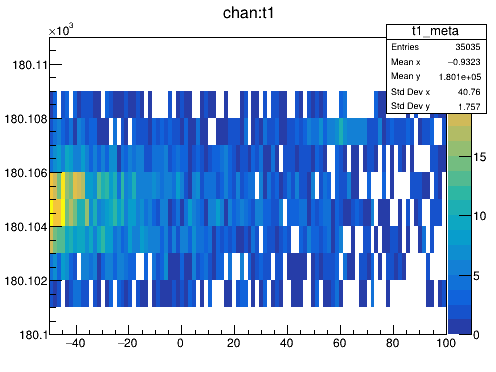

In [10]:
##################################################
##             overview TDC 0x0350              ##
##################################################


tdc=1801
disp_channels = 11
tree.Draw("chan:t1>>t1_meta(100,-50,100,{:d},{:d},{:d})".format(disp_channels,tdc*100,tdc*100+disp_channels),"","colz")
c.Draw()

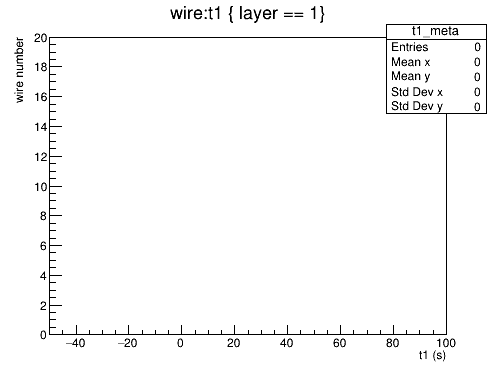

In [11]:
##################################################
##                   layer 1                    ##
##################################################

layer = 1
tree.Draw("wire:t1>>t1_meta(100,-50,100,{:d},{:d},{:d})".format(20,0,20)," layer == {:d}".format(layer),"colz")
t1_meta = f.Get("t1_meta")
#t1_meta.SetTitle("t1 meta")
t1_meta.GetXaxis().SetTitle("t1 (s)")
t1_meta.GetYaxis().SetTitle("wire number")
t1_meta.Draw("colz")
c.Draw()

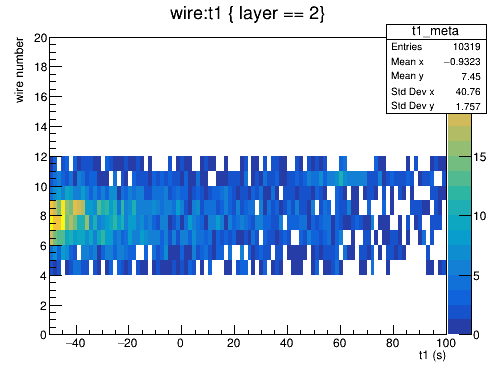

In [12]:
##################################################
##                   layer 2                    ##
##################################################

layer = 2
tree.Draw("wire:t1>>t1_meta(100,-50,100,{:d},{:d},{:d})".format(20,0,20)," layer == {:d}".format(layer),"colz")
t1_meta = f.Get("t1_meta")
#t1_meta.SetTitle("t1 meta")
t1_meta.GetXaxis().SetTitle("t1 (s)")
t1_meta.GetYaxis().SetTitle("wire number")
t1_meta.Draw("colz")
c.Draw()

Warning in <Fit>: Fit data is empty 


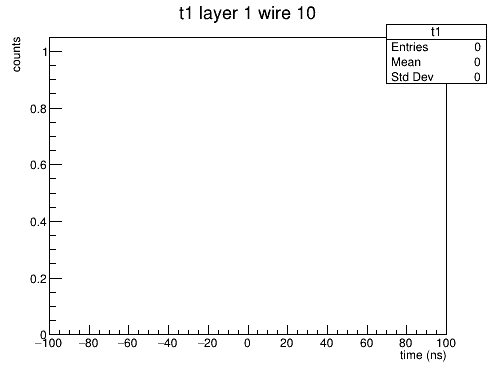

In [13]:
layer = 1
wire = 10

tree.Draw("t1>>t1(2000,-1000,1000)", "layer=={:d} && wire=={:d}".format(layer,wire),"colz")
t1=f.Get("t1")
t1.SetTitle("t1 layer {:d} wire {:d}".format(layer,wire))
t1.GetXaxis().SetTitle("time (ns)")
t1.GetYaxis().SetTitle("counts")

t1.GetXaxis().SetRangeUser(-100,100)
t1.Draw()
t1.Fit("gaus","WW")


c.Draw()

 FCN=41.1497 FROM MIGRAD    STATUS=CONVERGED     185 CALLS         186 TOTAL
                     EDM=7.19309e-08    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     1.62408e+00   6.85743e-01   3.58592e-04  -2.85188e-03
   2  Mean        -1.80880e+02   6.15410e+02   1.59484e-01  -4.92223e-06
   3  Sigma        3.49537e+02   4.45490e+02   9.89682e-04  -5.97235e-04


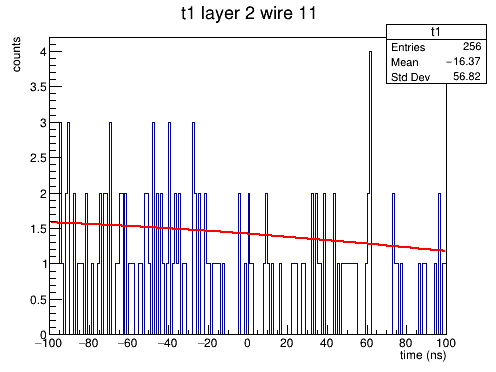

In [14]:
layer = 2
wire = 11

tree.Draw("t1>>t1(2000,-1000,1000)", "layer=={:d} && wire=={:d}".format(layer,wire),"colz")
t1=f.Get("t1")
t1.SetTitle("t1 layer {:d} wire {:d}".format(layer,wire))
t1.GetXaxis().SetTitle("time (ns)")
t1.GetYaxis().SetTitle("counts")

t1.GetXaxis().SetRangeUser(-100,100)
t1.Draw()
t1.Fit("gaus","WW")


c.Draw()

tree has 7134 entries


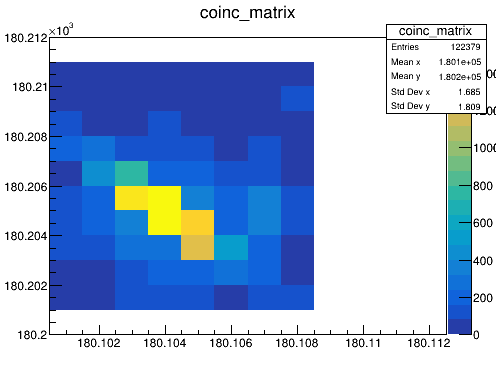

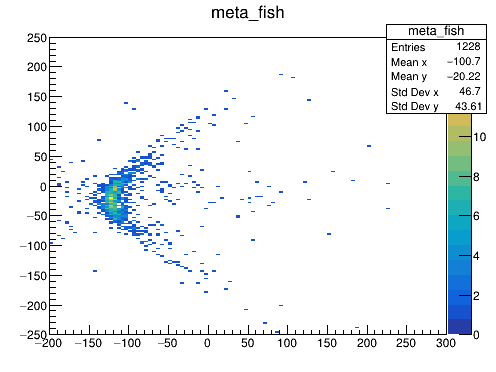

In [15]:
##################################################
##            read root tree example            ##
##################################################


t1_l = -3000
t1_r = 10000
tot_cutmin = 80

## variables that will be filled from root tree:
last_evt = 0

entries = tree.GetEntries()
print("tree has {:d} entries".format(entries))

processed_tracks = 0

coinc_matrix = ROOT.TH2F("coinc_matrix","coinc_matrix", 12, 180100.5, 180112.5, 12, 180200, 180212)

w = 50
coinc_wires = ROOT.TH2F("coinc_wires","coinc_wires", w, 0, w, w, 0, w)

meta_fish = ROOT.TH2F("meta_fish","meta_fish",200, -500, 500, 200, -250, 250);


entries_limit = int(1e6)

layer1_fish_wire = 180105
layer2_fish_wire = 180204

#for i in range(0,entries):
for i in range(0,np.min([entries_limit,entries])):
  
  tree.GetEntry(i)
  this_event = tree.event
  hits = this_event.hits
  
  n_hits = hits.size()
    
  for hit_no_a in range(0,n_hits):
    hit_a = hits[hit_no_a]
    for hit_no_b in range(hit_no_a,n_hits):
      hit_b = hits[hit_no_b]
    
      if ( (hit_a.t1 > t1_l and hit_a.t1 < t1_r)  and  (hit_b.t1 > t1_l and hit_b.t1 < t1_r) ):
      
        coinc_matrix.Fill(hit_a.chan,hit_b.chan)    
          
        coinc_wires.Fill(hit_a.wire + (hit_a.layer-1)*20 ,hit_b.wire + (hit_b.layer-1)*20)      
      
        if ( hit_a.tot > tot_cutmin and hit_b.tot > tot_cutmin and  (hit_a.chan == layer1_fish_wire) and  (hit_b.chan == layer2_fish_wire ) ):
          meta_fish.Fill(hit_a.t1 + hit_b.t1, hit_a.t1 - hit_b.t1)


#coinc_matrix.GetXaxis().SetRangeUser(35000,35050)
#coinc_matrix.GetYaxis().SetRangeUser(35000,35050)
coinc_matrix.Draw("colz")

c.Draw()
c2 = ROOT.TCanvas("myCanvasNam2e","The Canvas Title",500,400)
meta_fish.GetXaxis().SetRangeUser(-200,300)
meta_fish.Draw("colz")
c2.Draw() 

In [ ]:
c = [None]*100
meta_fishA = [None]*100
for channelaa in range(0,10):
    
    meta_fishA[channelaa] = ROOT.TH2F("meta_fish{:d}".format(channelaa),"meta_fish", 100, -500, 500, 50, -250, 250);
    layer1_fish_wire = 180100+channelaa
    layer2_fish_wire = 180204
    #for i in range(0,entries):
    for i in range(0,np.min([entries_limit,entries])):

      tree.GetEntry(i)
      this_event = tree.event
      hits = this_event.hits

      n_hits = hits.size()

      for hit_no_a in range(0,n_hits):
        hit_a = hits[hit_no_a]
        for hit_no_b in range(hit_no_a,n_hits):
          hit_b = hits[hit_no_b]

          if ( (hit_a.t1 > t1_l and hit_a.t1 < t1_r)  and  (hit_b.t1 > t1_l and hit_b.t1 < t1_r) ):


            if (   (hit_a.chan == layer1_fish_wire) and  (hit_b.chan == layer2_fish_wire ) ):
              meta_fishA[channelaa].Fill(hit_a.t1 + hit_b.t1, hit_a.t1 - hit_b.t1)


    c[channelaa] = ROOT.TCanvas("fish{:d}".format(channelaa) ,"The Canvas Title",500,400)
    #meta_fishA[channelaa].GetXaxis().SetRangeUser(-200,300)
    meta_fishA[channelaa].Draw("colz")
    c[channelaa] .Draw()

In [ ]:
c = ROOT.TCanvas("myCanvasName","The Canvas Title",500,400)


In [ ]:
meta_fish.GetYaxis().SetRangeUser(-17,-10)
meta_fish.GetXaxis().SetRangeUser(-200,300)
meta_fish.Draw("colz")
c.Draw()

In [ ]:
fish_proj_x= meta_fish.ProjectionX("fish_proj_x")
fish_proj_x.GetXaxis().SetRangeUser(-200,50)
fish_proj_x.Fit("gaus","WW")
fish_proj_x.Draw()
c.Draw()

In [ ]:

coinc_wires.Draw("colz")
coinc_wires.GetXaxis().SetTitle("(layer 1)" + " "*35 +  "(layer 2 + 10)" + " "*40 + "wires")
coinc_wires.GetYaxis().SetTitle("(layer 1)" + " "*20 +  "(layer 2 + 10)" + " "*25 + "wires")
c.Draw()

In [ ]:

coinc_wires.Draw("lego2")
coinc_wires.GetXaxis().SetTitle("(layer 1)" + " "*35 +  "(layer 2 + 10)" + " "*40 + "wires")
coinc_wires.GetYaxis().SetTitle("(layer 1)" + " "*20 +  "(layer 2 + 10)" + " "*25 + "wires")
c.Draw()

In [ ]:
# dont do the divergence scan

In [ ]:
archive(label="ufsd_fish_lowI_pAC_thr15")

X = np.arange(79-7,79+7+1,1)

outfile = ROOT.TFile("{:s}/outfile.root".format(data_dir),"RECREATE")

no_triggers = 4000

const_list = []
mean_list = []
sigma_list = []
entries_list = []

for x in X:
  micos_eco.move(x=x)
  take_data(events=no_triggers)
  c = ROOT.TCanvas("myCanvasName","The Canvas Title",500,400)
  f = ROOT.TFile("/workdir/joint_tree.root")
  os.system("cp /workdir/joint_tree.root {:s}/joint_tree_x{:3.3f}.root".format(data_dir,x))
  tree = f.Get("joint_tree")

  outfile.cd()
  layer = 2
  wire = 11
  
  tree.Draw("t1>>t1_x{:3.3f}(2000,-1000,1000)".format(x), "layer=={:d} && wire=={:d}".format(layer,wire),"colz")
  t1=outfile.Get("t1_x{:3.3f}".format(x))
  t1.SetTitle("t1 layer {:d} wire {:d}".format(layer,wire))
  t1.GetXaxis().SetTitle("time (ns)")
  t1.GetYaxis().SetTitle("counts")
  
  t1.GetXaxis().SetRangeUser(-100,100)
  t1.Draw()
  t1.Fit("gaus","WW")

  fit = t1.GetFunction("gaus");
  const_list   += [fit.GetParameter(0)]
  mean_list    += [fit.GetParameter(1)]
  sigma_list   += [fit.GetParameter(2)]
  entries_list += [t1.Integral(t1.FindBin(-100),t1.FindBin(100))]
  t1.Write()
  print("const_list")
  print(const_list)
  print("mean_list")
  print(mean_list)
  print("sigma_list")
  print(sigma_list)
  print("entries_list")
  print(entries_list)
  
  

outfile.Write()
outfile.Close()

#ufsd rate negligible in spill breaks

from matplotlib import pyplot as plt

plt.plot(X,entries_list,label="hist entries")
plt.ylim(0,np.max(entries_list))
plt.legend()
plt.show()

plt.plot(X,mean_list,label="fit mean (t1)")
plt.ylim(0,np.max(mean_list))
plt.legend()
plt.show()

plt.plot(X,const_list,label="fit const (t1)")
plt.ylim(0,np.max(const_list))
plt.legend()
plt.show()

plt.plot(X,sigma_list,label="fit sigma (t1)")
plt.ylim(0,np.max(sigma_list))
#plt.ylim(0,20)
plt.legend()
plt.show()

area_list = np.array(const_list) * np.array(sigma_list)

plt.plot(X,area_list,label="gaus area")
plt.ylim(0,np.max(area_list))
plt.legend()
plt.show()